<a href="https://colab.research.google.com/github/seshyblack/live2eat/blob/master/Live2Eat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
! pip install --upgrade google-cloud-videointelligence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 206 kB 6.2 MB/s 


In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow.keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow

In [ ]:
train_datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

In [ ]:
data = train_datagen.flow_from_directory( '/content/drive/MyDrive/Live2eat/training_images/' , 
                                         target_size=(224, 224) ,
                                         shuffle=False,
                                         class_mode='categorical',
                                         batch_size=54)

Found 54 images belonging to 6 classes.


In [ ]:
# train_datagen.flow_from_directory
# %pinfo2 train_datagen.flow_from_directory
# first_item = next(data)
# len(first_item)
# len(data[0][0]),len(data[0][1]),len(data[1][0]),len(data[1][1]),
#%pinfo2 test_data

In [ ]:
X_train=data[0][0]
X_train.shape

(54, 224, 224, 3)

In [ ]:
# Normalize the data
X_train_normalised = X_train/ 255

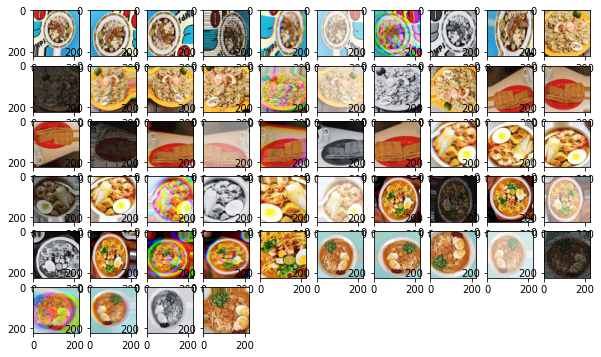

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(len((X_train))):
  plt.subplot(10, 10, i + 1)
  plt.imshow(X_train[i].astype('uint8'))

In [ ]:
test_datagen = ImageDataGenerator()

In [ ]:
test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/Live2eat/test_images' , target_size=(224,224),
                                             batch_size=54,shuffle=False,class_mode='categorical')

Found 54 images belonging to 6 classes.


In [ ]:
X_test=test_data[0][0]
X_test.shape

(54, 224, 224, 3)

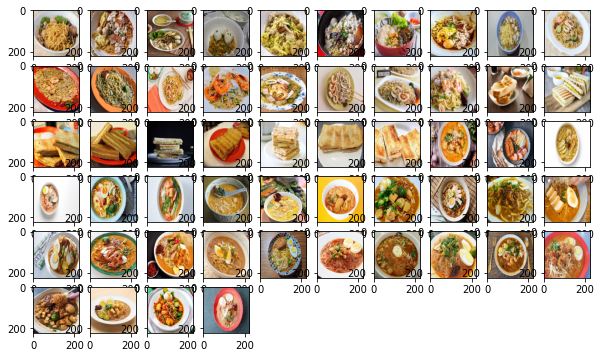

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in range(len((X_test))):
  plt.subplot(10, 10, i + 1)
  plt.imshow(X_test[i].astype('uint8'))

In [ ]:
y=test_data[0][1]

In [ ]:
# Model Architecture

model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))

model.add(Flatten(name='flatten'))

model.add(Dense(256, activation='relu', name='fc1'))

model.add(Dense(128, activation='relu', name='fc2'))

model.add(Dense(6, activation='softmax', name='output'))

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', # No need to OHE target
              optimizer='adam',
              metrics=['categorical_accuracy'])

In [ ]:
# fit the model
model.fit(X_train, y, 
          epochs=5,  # Use early stopping in practice
          batch_size=5, 
          verbose=1)

Epoch 1/5
11/11 [==============================] - 15s 294ms/step - loss: 173.2194 - categorical_accuracy: 0.1667
Epoch 2/5
11/11 [==============================] - 1s 93ms/step - loss: 1.8821 - categorical_accuracy: 0.1296
Epoch 3/5
11/11 [==============================] - 1s 92ms/step - loss: 1.8364 - categorical_accuracy: 0.1111
Epoch 4/5
11/11 [==============================] - 1s 92ms/step - loss: 1.8009 - categorical_accuracy: 0.1667
Epoch 5/5
11/11 [==============================] - 1s 93ms/step - loss: 1.7923 - categorical_accuracy: 0.1667


In [ ]:
predict_data = test_datagen.flow_from_directory('/content/drive/MyDrive/Live2eat/Predict' , target_size=(224,224),
                                             batch_size=2,shuffle=False,class_mode='categorical')

Found 2 images belonging to 1 classes.


In [ ]:
precict_data_normalised=predict_data[0][0]/255

In [ ]:
data.class_indices

{'Bak Chor Mee': 0,
 'Hokkien Mee': 1,
 'Kaya Toast': 2,
 'Laksa': 3,
 'Mee Rebus': 4,
 'Mee Siam': 5}

In [ ]:
predict_data.class_indices

{'predict': 0}

In [ ]:
pred = model.predict(precict_data_normalised)
pred

1/1 [==============================] - 1s 972ms/step


array([[0.16818994, 0.16541259, 0.16727401, 0.16484316, 0.16794804,
        0.16633223],
       [0.16818994, 0.16541256, 0.16727404, 0.16484319, 0.16794801,
        0.16633223]], dtype=float32)

In [ ]:
# # Test Set Accuracy
# accuracy = model.evaluate(X_test)
